In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
# Choose the graph you want to plot (1-5)
# 1: com-youtube
# 2: roadNet-PA
# 3: soc-LiveJournal1
# 4: BA 50M
# 5: com-friendster

graph = 5


# com-youtube
if graph == 1:
    file = 'data/dfs/thread/com-youtube.ungraph_dfs_thread_nvm0'
    file2 = 'data/dfs/thread/com-youtube.ungraph_dfs_thread_nvm1'
    file3 = 'data/dfs/thread/com-youtube.ungraph_dfs_thread_ssd'
    output_path = 'plot/dfs/dfs_thread_com-youtube'
# roadNet-PA
elif graph == 2:
    file = 'data/dfs/thread/roadNet-PA_dfs_thread_nvm0'
    file2 = 'data/dfs/thread/roadNet-PA_dfs_thread_nvm1'
    file3 = 'data/dfs/thread/roadNet-PA_dfs_thread_ssd'
    output_path = 'plot/dfs/dfs_thread_roadNet-PA'
# soc-LiveJournal1
elif graph == 3:
    file = 'data/dfs/thread/soc-LiveJournal1_dfs_thread_nvm0'
    file2 = 'data/dfs/thread/soc-LiveJournal1_dfs_thread_nvm1'
    file3 = 'data/dfs/thread/soc-LiveJournal1_dfs_thread_ssd'
    output_path = 'plot/dfs/dfs_thread_soc-LiveJournal1'
# BA 50M
elif graph == 4:
    file = 'data/dfs/thread/BA_50000000_1249M_dfs_thread_nvm0'
    file2 = 'data/dfs/thread/BA_50000000_1249M_dfs_thread_nvm1'
    file3 = 'data/dfs/thread/BA_50000000_1249M_dfs_thread_ssd'
    output_path = 'plot/dfs/dfs_thread_BA_50000000'
# com-friendster
elif graph == 5:
    file = 'data/dfs/thread/com-friendster.ungraph_dfs_thread_nvm0'
    file2 = 'data/dfs/thread/com-friendster.ungraph_dfs_thread_nvm1'
    file3 = 'data/dfs/thread/com-friendster.ungraph_dfs_thread_ssd'
    output_path = 'plot/dfs/dfs_thread_com-friendster'

In [41]:
# Load NVM0
df = pd.read_csv( file + '.csv')

# Cleaning data
df['time'] = df['time'].apply(lambda x: x*(10**-6))
df = df.drop(['res'], axis=1)
df = df.drop(['cache_mb'], axis=1)
df = df.groupby(['algo_name', 'thread']).mean().reset_index()
# df = df.drop(['key'], axis=1).groupby(['name', 'type', 'thread']).sum().reset_index()
index = df[ (df['thread'] > 128) ].index
df.drop(index , inplace=True)

# df to array
nvm0 = df['time'].to_numpy()
# bfs_blocked_arr = bfs_blocked['time'].to_numpy()

thread = pd.unique(df['thread'])

x = list(range(len(thread)))

# Line 1
y1 = nvm0
y1_name = "CAVE-DFS (PCIe)"

df

,algo_name,thread,time
0,dfs,1,1733.068994
1,dfs,2,882.842460
2,dfs,4,454.823005
3,dfs,8,241.173494
4,dfs,16,136.650240
5,dfs,32,89.781265
6,dfs,64,60.775605
7,dfs,128,50.137427


In [42]:
# Load NVM1
df = pd.read_csv( file2 + '.csv')

# Cleaning data
df['time'] = df['time'].apply(lambda x: x*(10**-6))
df = df.drop(['res'], axis=1)
df = df.drop(['cache_mb'], axis=1)
df = df.groupby(['algo_name', 'thread']).mean().reset_index()
index = df[ (df['thread'] > 128) ].index
df.drop(index , inplace=True)

# df to array
nvm1 = df['time'].to_numpy()

# Line 2
y2 = nvm1
y2_name = "CAVE-DFS (Optane)"

df

,algo_name,thread,time
0,dfs,1,346.168280
1,dfs,2,189.429808
2,dfs,4,103.537332
3,dfs,8,65.162868
4,dfs,16,44.885019
5,dfs,32,41.162102
6,dfs,64,47.761280
7,dfs,128,48.873660


In [43]:
# Load SSD
df = pd.read_csv( file3 + '.csv')

# Cleaning data
df['time'] = df['time'].apply(lambda x: x*(10**-6))
df = df.drop(['res'], axis=1)
df = df.drop(['cache_mb'], axis=1)
df = df.groupby(['algo_name', 'thread']).mean().reset_index()
index = df[ (df['thread'] > 128) ].index
df.drop(index , inplace=True)

# df to array
ssd = df['time'].to_numpy()

# Line 2
y3 = ssd
y3_name = "CAVE-DFS (SATA)"

df

,algo_name,thread,time
0,dfs,1,2480.024421
1,dfs,2,1231.756552
2,dfs,4,680.815966
3,dfs,8,428.653882
4,dfs,16,325.784354
5,dfs,32,287.817898
6,dfs,64,286.327134
7,dfs,128,286.721156


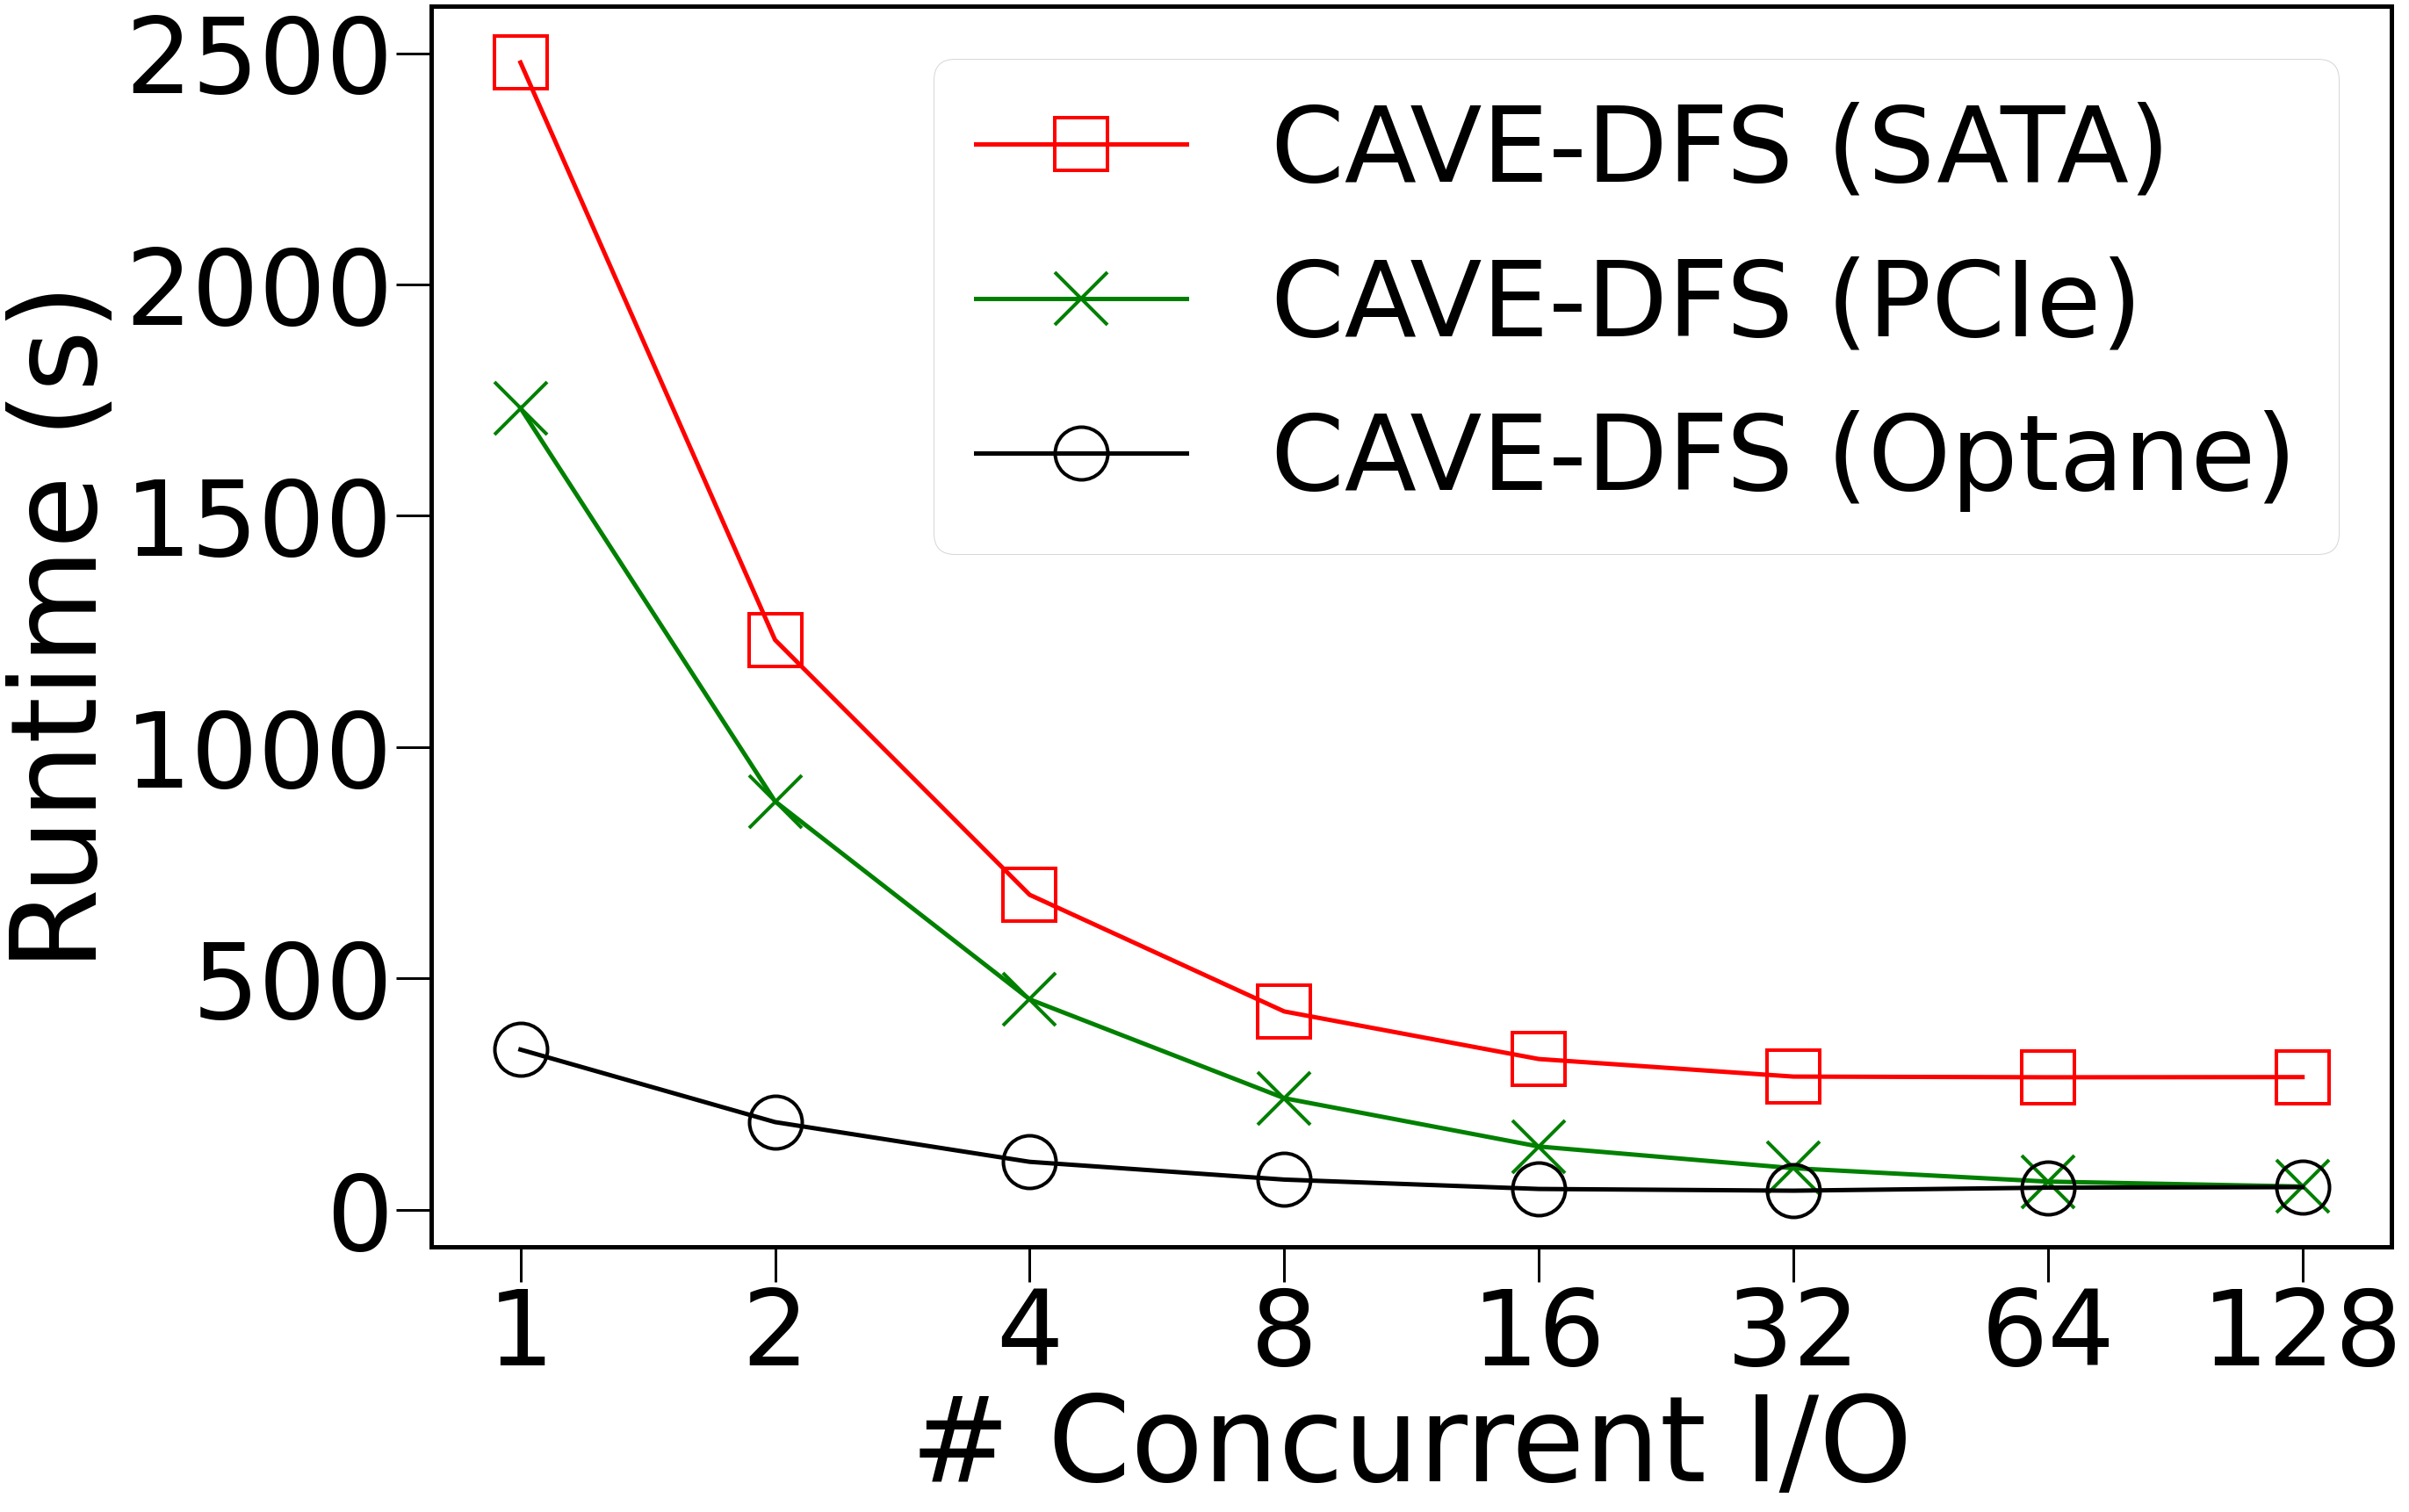

In [44]:
# Graph Settings
fig = plt.figure(figsize=(40,26))
# plt.title(title,fontsize=52)

x_label = "# Concurrent I/O"
y_label = "Runtime (s)"
    
plt.xlabel(x_label,fontsize=135)
plt.ylabel(y_label,fontsize=135)

plt.rc('xtick', labelsize = 120)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 120)    # fontsize of the tick labels
plt.rc('legend', fontsize = 120)    # legend fontsize
plt.rc('lines', linewidth = 5)     # line width
plt.rc('lines', markersize = 60)   # marker size
plt.rc('lines', markeredgewidth = 4)   # marker edge width
plt.rc('lines', markerfacecolor = 'none') 

plt.rcParams["axes.linewidth"] = 5    #Border width

plt.xticks(x,thread)
# plt.xticks(x,num_fsize)
# plt.yscale('log')
plt.tick_params(direction='out', length=40, width=3)    # Change tick size

# Plot lines
plt.plot(x, y3, marker='s', color='red', label=y3_name)
plt.plot(x, y1, marker='x', color='green', label=y1_name)
plt.plot(x, y2, marker='o', color='black', label=y2_name)

# plt.ylim(top=2500)

if graph == 4 or 5:
    plt.yticks([0, 500, 1000, 1500, 2000, 2500], [0, 500, 1000, 1500, 2000, 2500])

plt.legend()


plt.savefig(output_path +'.pdf', bbox_inches = "tight")

# If output front is small, rerun this cell